## **Task-2 : MOVIE RATING PREDICTION WITH PYTHON**

The entertainment industry, especially cinema, has long captured the fascination of audiences worldwide. Understanding what factors contribute to a movie's success or failure is a multifaceted challenge that has significant implications for filmmakers, producers, and marketers. One of the key indicators of a movie's success is its rating, which reflects the collective judgment of both critics and audiences. Predicting these ratings can provide valuable insights into the elements that resonate with viewers and can guide future production decisions.

In this project, we aim to build a model that predicts the rating of a movie based on various features such as genre, director, and actors. By leveraging historical movie data, we will employ regression techniques to develop a robust predictive model. This approach not only allows us to estimate movie ratings with a high degree of accuracy but also offers a deeper understanding of the factors that influence these ratings.

The Movie Rating Prediction project involves several key steps, including data analysis, preprocessing, feature engineering, and machine learning modeling. Through data analysis, we will uncover patterns and trends within the data. Preprocessing will ensure that the data is clean and suitable for modeling. Feature engineering will help us create meaningful variables that capture the essence of each movie. Finally, we will use machine learning techniques to build and refine a model that can accurately predict movie ratings.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the data using 'latin1' encoding
df = pd.read_csv("/content/IMDb Movies India.csv", encoding='latin1')

# Display the first few rows to check if it loaded correctly
print(df.head())

                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  
3  Siddhant Kapoor  
4    

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [6]:
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


## **Data Cleaning**

In [7]:
# check missing value or NULL values
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [8]:
# Dropping NA in the Rating Column
df.dropna(subset=["Rating"], inplace = True)

In [9]:
df.isnull().sum()

Name           0
Year           0
Duration    2068
Genre        102
Rating         0
Votes          0
Director       5
Actor 1      125
Actor 2      200
Actor 3      292
dtype: int64

In [10]:
# Fill missing values in categorical columns with "Unknown"
categorical_columns = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Year']
df[categorical_columns] = df[categorical_columns].fillna('Unknown')

In [11]:
# Convert 'Duration' to numeric, extracting numeric part, then fill NaN with median
df['Duration'] = df['Duration'].str.extract('(\d+)').astype(float)
df['Duration'] = df['Duration'].fillna(df['Duration'].median())

In [12]:
df.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [13]:
# convert votes columns
df['Votes'] = df['Votes'].str.replace(',','').astype(int)

# convert year columns
df['Year'] = df['Year'].str.strip('()').astype(int)

### Now the data is cleaned, and we can begin with the EDA for further analysis.

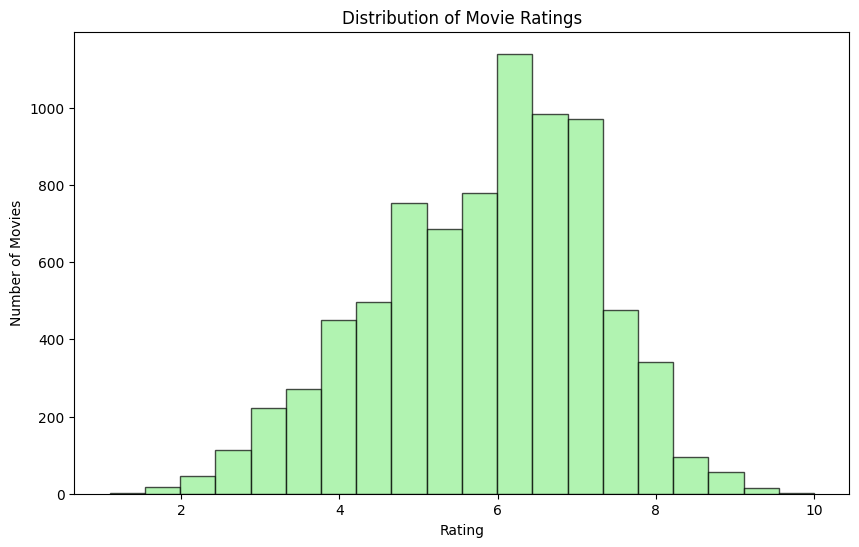

In [14]:
# Plotting the histogram for movie ratings
plt.figure(figsize=(10, 6))
cmap = plt.get_cmap('viridis')
plt.hist(df['Rating'], bins=20, color='lightgreen', edgecolor='black', alpha=0.7)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Movies')

# Show the plot
plt.show()

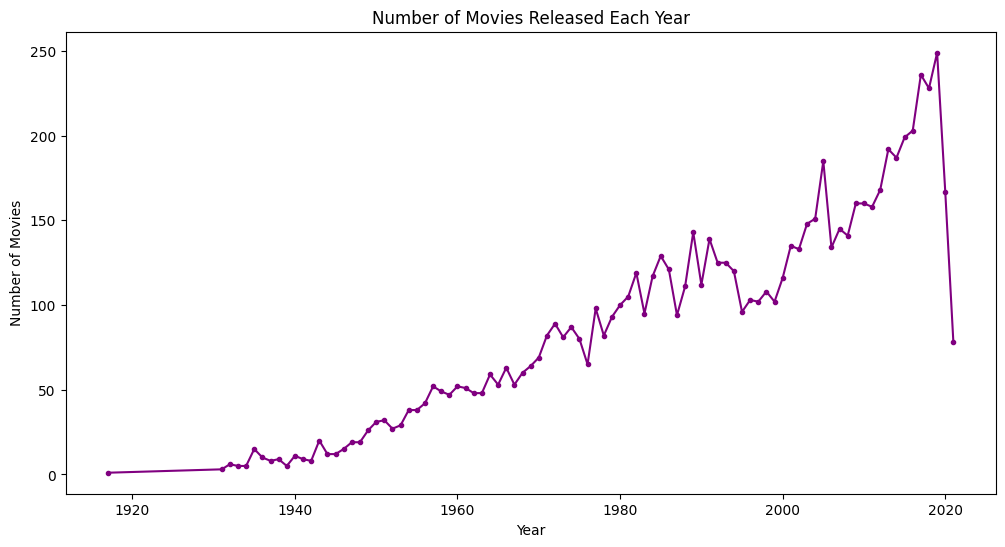

In [15]:

# Count the number of movies released each year
movies_per_year = df['Year'].value_counts().sort_index()

# Plotting the line chart for the number of movies released each year
plt.figure(figsize=(12, 6))
plt.plot(movies_per_year.index, movies_per_year.values, marker='.', linestyle='-', color='purple')
plt.title('Number of Movies Released Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')


# Show the plot
plt.show()

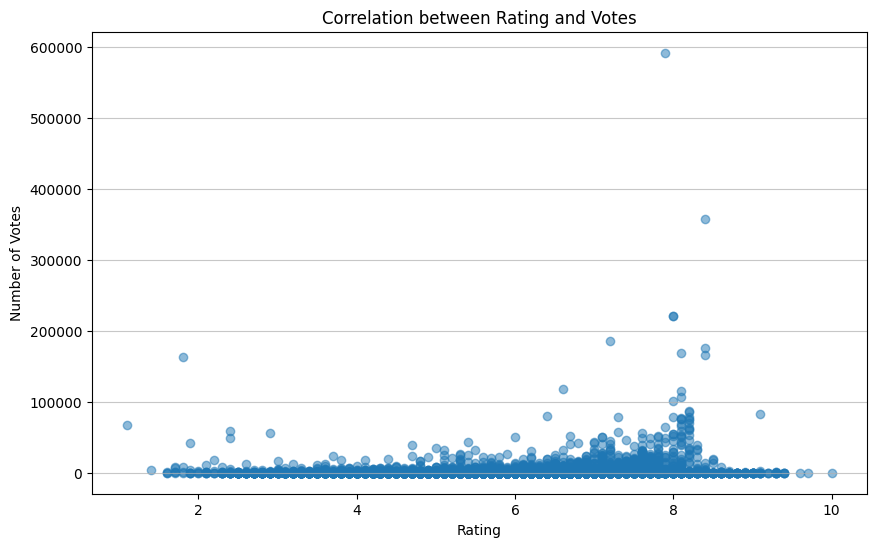

In [16]:
# Plotting the scatter plot for the relationship between movie ratings and number of votes
plt.figure(figsize=(10, 6))
plt.scatter(df['Rating'], df['Votes'], alpha=0.5)
plt.title('Correlation between Rating and Votes')
plt.xlabel('Rating')
plt.ylabel('Number of Votes')
plt.grid(axis='y', alpha=0.7)

# Show the plot
plt.show()

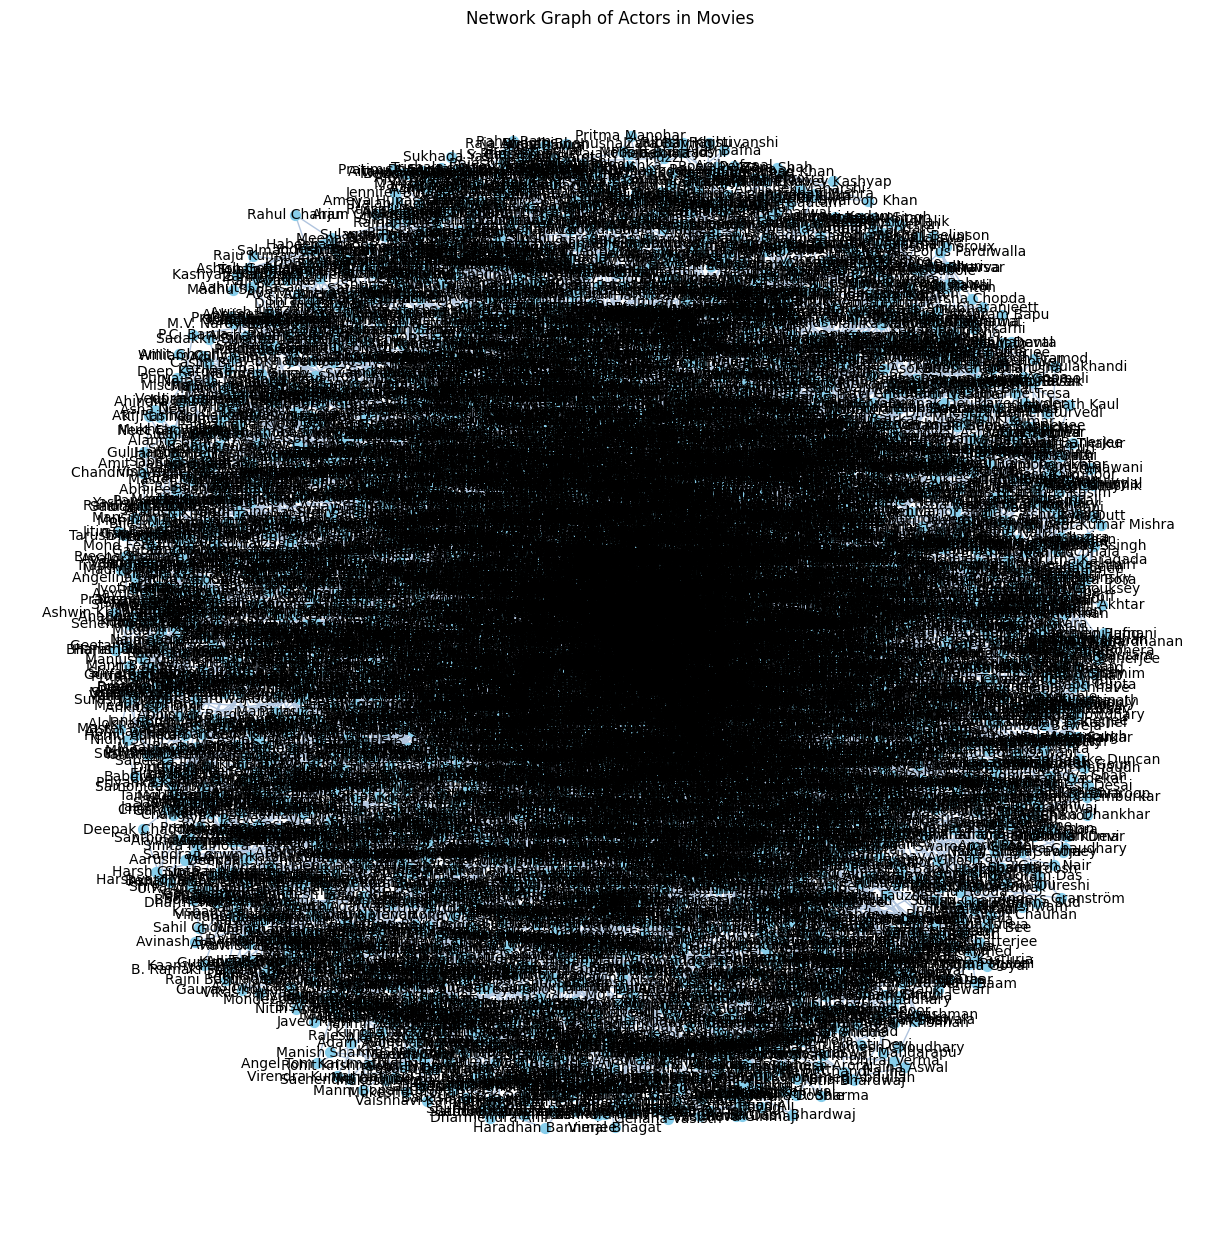

In [17]:
import networkx as nx
from itertools import combinations

# Extract relevant columns
actors = df[['Actor 1', 'Actor 2', 'Actor 3']]

# Create a list of actor pairs
actor_pairs = []
for _, row in actors.iterrows():
    row = row.dropna().tolist()
    actor_pairs.extend(combinations(row, 2))

# Build the graph
G = nx.Graph()
G.add_edges_from(actor_pairs)

# Plot the network graph
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.1)  # positions for all nodes
nx.draw(G, pos, with_labels=True, node_size=50, node_color="skyblue", edge_color="#B0C4DE", linewidths=1, font_size=10)
plt.title('Network Graph of Actors in Movies')
plt.show()

In [18]:
genre_counts = df['Genre'].value_counts().reset_index()
genre_counts.columns = ['Genre', 'Count']

# Select the top N genres (e.g., top 5)
top_n_genres = genre_counts.head(5)
top_n_genres

,Genre,Count
0,Drama,1177
1,"Drama, Romance",447
2,"Action, Crime, Drama",417
3,Action,417
4,"Drama, Family",291


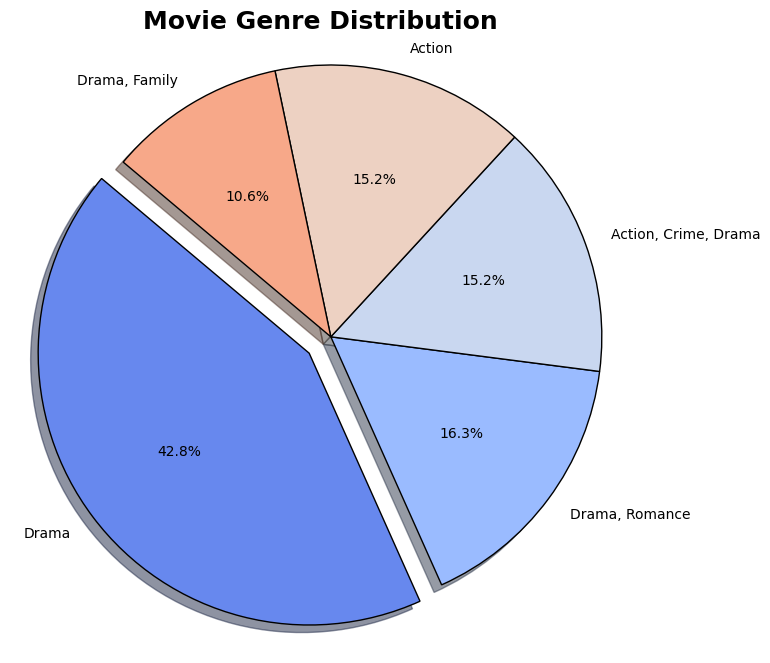

In [19]:
# Set the color palette
colors = sns.color_palette('coolwarm')  # You can choose any other palette like 'deep', 'muted', etc.

# Create the figure and axis objects
plt.figure(figsize=(8, 8))  # Increase the figure size for better visibility

# Create the pie chart
plt.pie(
    top_n_genres['Count'],
    labels=top_n_genres['Genre'],
    autopct='%1.1f%%',  # Show the percentage on the chart
    startangle=140,
    colors=colors,
    shadow=True,  # Add shadow for a 3D effect
    explode=(0.1, 0, 0, 0, 0),  # 'Explode' the 1st slice (Action)
    wedgeprops={'edgecolor': 'black'}  # Add edge color to the wedges for better distinction
)

# Add a title and improve the font size
plt.title('Movie Genre Distribution', fontsize=18, fontweight='bold')

# Ensure the pie chart is a circle rather than an oval
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the plot
plt.show()

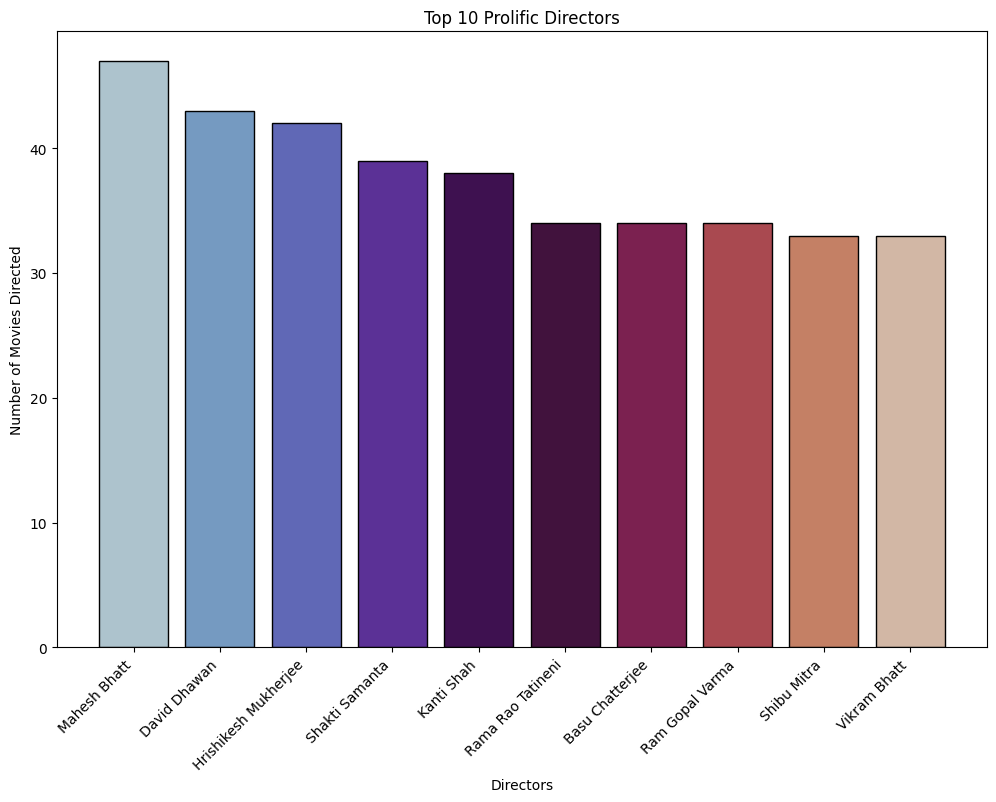

In [20]:
# Count the number of movies per director
movie_counts = df['Director'].value_counts()

# Select the top 10 directors
top_directors = movie_counts.head(10)

# Set the color palette using Seaborn, ensuring there are enough colors for each bar
colors = sns.color_palette('twilight', n_colors=len(top_directors))

# Plotting
plt.figure(figsize=(12, 8))
plt.bar(top_directors.index, top_directors.values, edgecolor = 'black', color=colors)  # Correct parameter is 'color', not 'colors'
plt.title('Top 10 Prolific Directors')
plt.xlabel('Directors')
plt.ylabel('Number of Movies Directed')
plt.xticks(rotation=45, ha='right')  # Ha is the horizontal alignment for the labels
plt.show()

In [21]:
actor_counts = df['Actor 1'].value_counts().reset_index()
actor_counts.columns = ['Actor', 'MovieCount']

top_n_actors = actor_counts.head(10)
top_n_actors

,Actor,MovieCount
0,Jeetendra,140
1,Dharmendra,134
2,Mithun Chakraborty,130
3,Unknown,125
4,Ashok Kumar,125
5,Rajesh Khanna,118
6,Amitabh Bachchan,117
7,Dev Anand,91
8,Shashi Kapoor,88
9,Akshay Kumar,82


In [22]:
filtered_df = df[(df['Rating'] > 8) & (df['Votes'] > 10000)]
filtered_df.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
75,3 Idiots,2009,170.0,"Comedy, Drama",8.4,357889,Rajkumar Hirani,Aamir Khan,Madhavan,Mona Singh
173,A Wednesday,2008,104.0,"Action, Crime, Drama",8.1,75118,Neeraj Pandey,Anupam Kher,Naseeruddin Shah,Jimmy Sheirgill
981,Anand,1971,122.0,"Drama, Musical",8.3,31937,Hrishikesh Mukherjee,Rajesh Khanna,Amitabh Bachchan,Sumita Sanyal
1009,Andaz Apna Apna,1994,160.0,"Action, Comedy, Romance",8.1,50810,Rajkumar Santoshi,Aamir Khan,Salman Khan,Raveena Tandon
1019,Andhadhun,2018,139.0,"Crime, Drama, Music",8.2,77901,Sriram Raghavan,Ayushmann Khurrana,Tabu,Radhika Apte
1285,Article 15,2019,130.0,"Crime, Drama, Mystery",8.2,25706,Anubhav Sinha,Ayushmann Khurrana,Nassar,Manoj Pahwa
1877,Barfi!,2012,151.0,"Comedy, Drama, Romance",8.1,77377,Anurag Basu,Ranbir Kapoor,Priyanka Chopra Jonas,Ileana D'Cruz
2065,Bhaag Milkha Bhaag,2013,186.0,"Biography, Drama, Sport",8.2,62636,Rakeysh Omprakash Mehra,Farhan Akhtar,Sonam Kapoor,Pawan Malhotra
2412,Black,2005,122.0,Drama,8.2,33782,Sanjay Leela Bhansali,Amitabh Bachchan,Rani Mukerji,Shernaz Patel
2425,Black Friday,2004,143.0,"Action, Crime, Drama",8.5,19493,Anurag Kashyap,Kay Kay Menon,Pawan Malhotra,Aditya Srivastav


<ipython-input-25-f5e6b0d063b3>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')


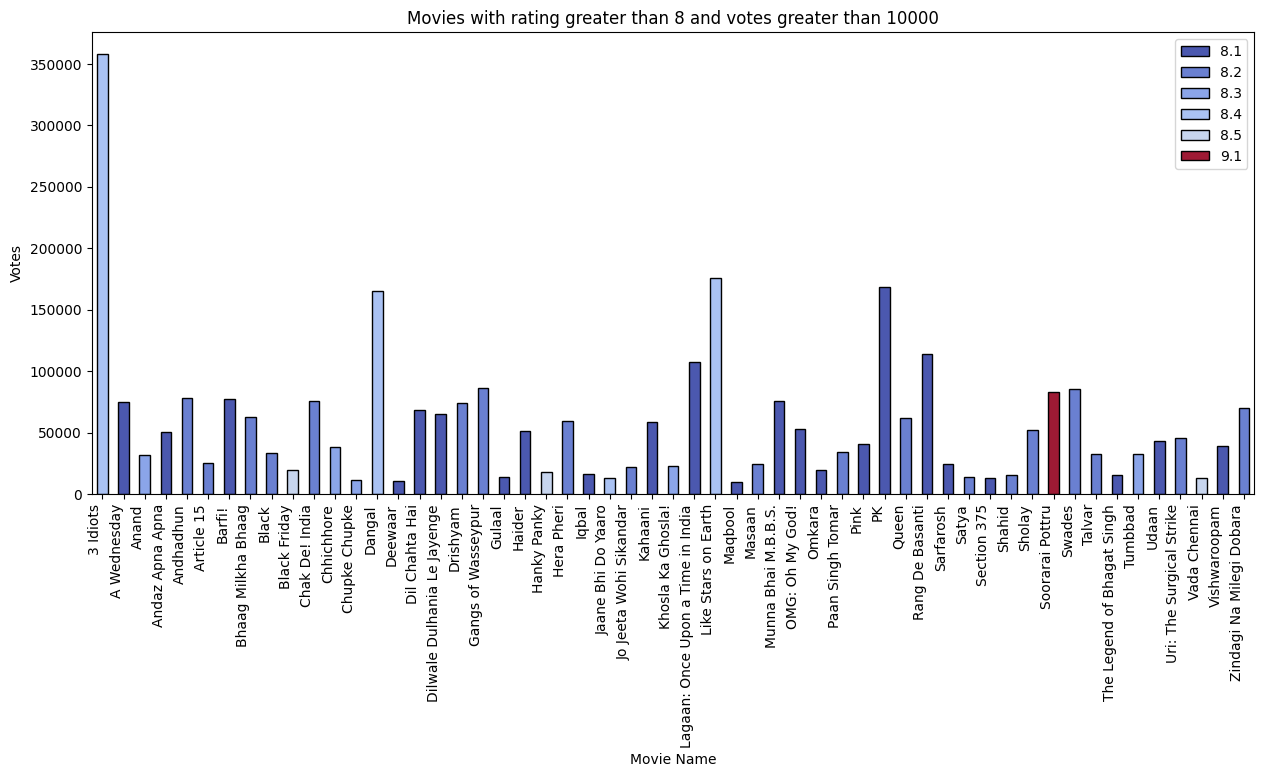

In [25]:
plt.figure(figsize=(15, 6))
ax=sns.barplot(data=filtered_df,x='Name',y='Votes',hue='Rating',dodge=False,width=0.5,palette='coolwarm', edgecolor = 'black')

ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
ax.legend(loc='upper right')
ax.set_xlabel('Movie Name')
ax.set_ylabel('Votes')
ax.set_title('Movies with rating greater than 8 and votes greater than 10000')

plt.show()

## **Featured Engineering**

In [26]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

trans_data = df.drop(['Name'],axis=1)
# Transform Director columns
trans_data['Director'] = labelencoder.fit_transform(df['Director'])

# Transform Actors Columns
trans_data['Actor 1'] = labelencoder.fit_transform(df['Actor 1'])
trans_data['Actor 2'] = labelencoder.fit_transform(df['Actor 2'])
trans_data['Actor 3'] = labelencoder.fit_transform(df['Actor 3'])

trans_data['Genre'] = labelencoder.fit_transform(df['Genre'].apply(lambda x: ', '.join(x)))

trans_data.head()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,2019,109.0,268,7.0,8,811,1782,2815,377
3,2019,110.0,207,4.4,35,1749,1589,890,2572
5,1997,147.0,177,4.7,827,2005,508,85,2449
6,2005,142.0,331,7.4,1086,2643,931,1388,3030
8,2012,82.0,367,5.6,326,174,2521,1461,1205


In [27]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
sc_data = scaler.fit_transform(trans_data)
sc_df = pd.DataFrame(sc_data,columns=trans_data.columns)

sc_df.head()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,0.980769,0.293333,0.620370,0.662921,0.000005,0.258363,0.698550,0.979812,0.123042
1,0.980769,0.296667,0.479167,0.370787,0.000051,0.557184,0.622893,0.309781,0.839426
2,0.769231,0.420000,0.409722,0.404494,0.001390,0.638738,0.199138,0.029586,0.799282
3,0.846154,0.403333,0.766204,0.707865,0.001828,0.841988,0.364955,0.483119,0.988903
4,0.913462,0.203333,0.849537,0.505618,0.000543,0.055432,0.988240,0.508528,0.393277


## **Examine Correlation of Data**

In [28]:
# correlation
corr_df = trans_data.corr(numeric_only=True)
corr_df['Rating'].sort_values(ascending=False)

Rating      1.000000
Genre       0.127680
Votes       0.126635
Actor 2     0.056275
Actor 3     0.056101
Actor 1     0.037145
Director   -0.008581
Duration   -0.030474
Year       -0.166673
Name: Rating, dtype: float64

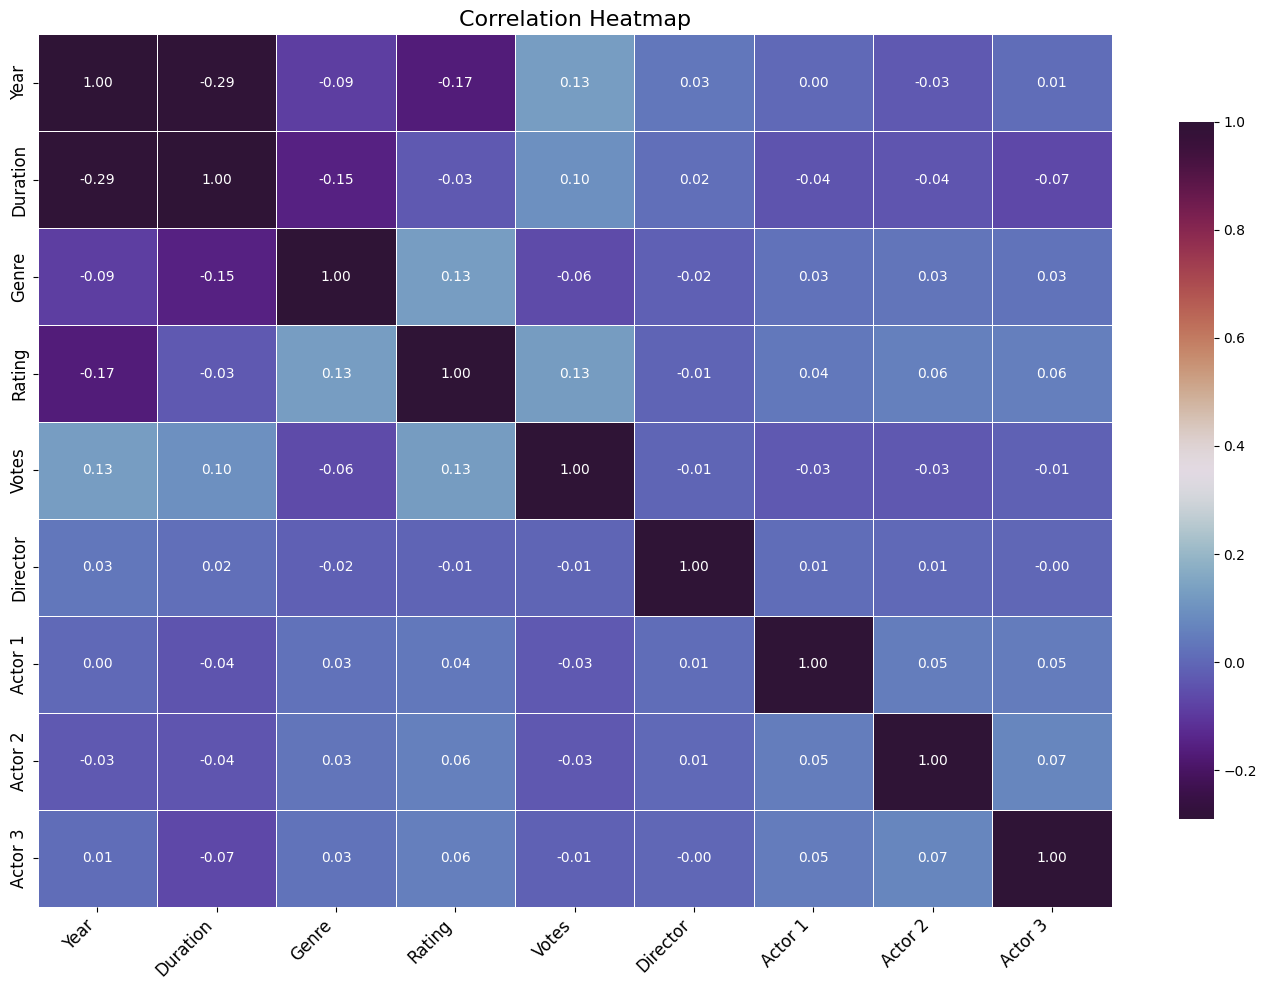

In [37]:
# Assuming corr_df is your correlation DataFrame
plt.figure(figsize=(14, 10))
sns.heatmap(corr_df, annot=True, fmt=".2f", cmap="twilight_shifted", linewidths=0.5, linecolor='white',
            cbar_kws={'shrink': 0.8}, annot_kws={"size": 10})

# Adding titles and labels
plt.title('Correlation Heatmap', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

# put data except Rating data
X = trans_data.drop(['Rating'],axis=1)

# Put only Rating data
y = trans_data['Rating']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [40]:
X_test = np.array(X_test)

In [42]:

y_pred = model.predict(X_test)
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([5.92697743, 5.51300109, 5.22361551, ..., 5.67147139, 6.08540294,
       5.3619457 ])

In [44]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}, RMSE: {rmse}, R2: {r2}')

MSE: 1.7216038695805493, RMSE: 1.3120990319257726, R2: 0.095653554697115
